# A Clique of Dividing Numbers

Not a real name. The task: given a set of integers, all of them unique, find the largest (in terms of the number of elements) subset of them, so that for all pairs of numbers a,b in this subset either a divides b, or b divides a.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def create_set_tight(n=None):
    """Creates a set of n numbers to test the algorithm"""
    if n is None:
        n = np.random.randint(20)
    nprimes = np.random.randint(low=3,high=max(np.floor(n*0.3),5)) # Probability of including new primes
    print('N primes:',nprimes)
    
    i = 2
    primes = [2] # Generate n primes (1 will be added at the end)
    while len(primes) < n-1:
        i += 1
        if not any([bool(i % j ==0) for j in primes]):
            primes.append(i)
    primes = [1] + primes
    
    out = []
    for i in range(nprimes): # Pick nprimes at random
        out.append(primes.pop(np.random.randint(len(primes))))
        
    for i in range(nprimes,n):
        while True:
            pickp = out[np.random.randint(nprimes)]  # One of the primes
            pickb = np.random.randint(1,n) # Some other number
            if pickb*pickp not in out:
                out.append(pickb*pickp)
                break
        
    return out


def augment_set(x,n=None):
    '''Adds other random numbers to the set'''
    if n is None: n = 2*len(x)
    out = x[:]
    max_value = max(x) + n - len(x) # A very safe value that should work for both small and large arrays
    while len(out)<n:
        pick = np.random.randint(max_value)
        if pick not in out:
            out.append(pick)    
    return out


    
x = create_set_tight(100)
print(x)
x = augment_set(x)
print(x)

N primes: 28
[317, 479, 491, 89, 13, 347, 421, 499, 389, 23, 103, 503, 83, 433, 173, 311, 17, 181, 223, 521, 79, 3, 167, 137, 379, 373, 149, 463, 356, 36427, 30743, 183, 41568, 288, 959, 865, 31996, 26063, 9193, 35506, 3026, 1292, 44910, 16765, 4635, 8961, 25653, 72, 13015, 4927, 1003, 15293, 24908, 2334, 1660, 28628, 29697, 29545, 25150, 6383, 1081, 51, 47405, 34, 7672, 12046, 14588, 4354, 43258, 694, 7261, 93, 18681, 8549, 3725, 3836, 581, 5063, 9854, 4438, 3399, 7780, 1916, 10197, 20840, 4476, 1473, 11920, 29441, 45505, 8028, 45270, 30699, 37048, 24618, 19904, 22224, 13856, 9853, 10574]
[317, 479, 491, 89, 13, 347, 421, 499, 389, 23, 103, 503, 83, 433, 173, 311, 17, 181, 223, 521, 79, 3, 167, 137, 379, 373, 149, 463, 356, 36427, 30743, 183, 41568, 288, 959, 865, 31996, 26063, 9193, 35506, 3026, 1292, 44910, 16765, 4635, 8961, 25653, 72, 13015, 4927, 1003, 15293, 24908, 2334, 1660, 28628, 29697, 29545, 25150, 6383, 1081, 51, 47405, 34, 7672, 12046, 14588, 4354, 43258, 694, 7261, 93, 

In [3]:
# One of the test cases form LeetCode:
x0 = [832,33,531,416,335,298,365,352,582,936,366,305,930,530,97,349,71,295,840,108,299,804,925,627,953,571,658,732,429,
      136,563,462,666,330,796,315,695,500,896,982,217,200,912,98,297,612,169,943,628,593,959,904,219,240,857,789,897,
      940,569,384,502,382,401,184,716,230,29,963,211,597,515,122,163,86,215,105,889,842,49,847,267,87,954,407,245,975,
      719,746,709,471,281,238,186,510,618,149,73,214,663,194,260,825,631,474,519,668,329,718,765,947,156,353,490,962,679,
      560,59,387,31,692,976,568,201,273,159,730,819,418,906,801,892,672,559,866,389,675,812,744,164,737,57,195,115,933,
      158,909,598,359,853,314,983,11,395,153,781,301,838,625,704,256,351,996,225,644,521,509,674,417,272,622,937,723,632,
      331,228,412,181,435,469,157,368,524,38,132,325,420,127,731,771,604,505,634,67,374,894,3,448,878,686,641,316,207,
      76,363,795,235,770,446,820,493,177,816,615,410,117,944,829,190,831,289,516,964,170,134,671,885,682,119,402,82,485,
      901,375,68,858,739,56,974,683,884,815,872,715,104,290,348,588,834,788,472,466,867,550,779,65,802,459,440,870,753,
      608,808,623,642,44,437,865,758,540,506,691,958,854,546,39,595,369,504,63,311,722,441,786,899,338,651,874,946,811,
      848,939,284,824,309,653,133,514,460,678,54,399,759,468,61,480,783,266,900,400,237,403,534,213,914,473,198,380,373,
      288,154,844,535,409,249,285,168,69,345,647,851,846,264,102,246,106,648,576,212,438,981,987,379,360,667,95,172,101,
      580,891,385,747,161,927,361,818,657,171,342,232,734,714,362,425,475,28,41,551,142,131,51,229,9,607,326,522,687,792,
      845,665,358,91,720,155,565,99,26,650,539,780,589,950,935,372,227,424,750,833,554,841,552,60,757,430,916,140,790,
      426,776,96,199,923,806,949,755,711,659,911,611,310,774,265,880,690,706,761,286,255,756,204,444,478,601,529,669,241,
      784,566,528,208,270,511,236,271,378,58,453,467,233,250,567,296,932,989,367,626,35,162,887,572,603,564,797,280,406,
      970,689,408,431,638,489,85,50,357,803,47,555,793,422,763,110,869,861,253,320,538,347,405,769,64,875,630,537,328,
      553,166,948,303,160,800,507,920,922,90,693,636,17,455,183,210,856,762,656,174,873,579,176,688,640,1,938,902,341,
      740,581,427,111,972,443,22,791,304,574,575,725,477,700,817,381,479,248,121,411,547,182,871,599,203,13,224,541,
      724,178,775,388,4,251,321,52,88,100,279,614,839,84,151,735,40,752,773,376,77,476,708,396,988,961,24,231,445,609,
      952,965,986,414,451,881,42,257,32,334,130,596,527,94,333,317,244,960,710,852,862,421,81,37,452,274,187,268,520,491,
      778,18,743,620,145,72,370,118,748,633,997,436,143,573,495,180,34]
expected = [1,3,9,18,90,180,360,720]

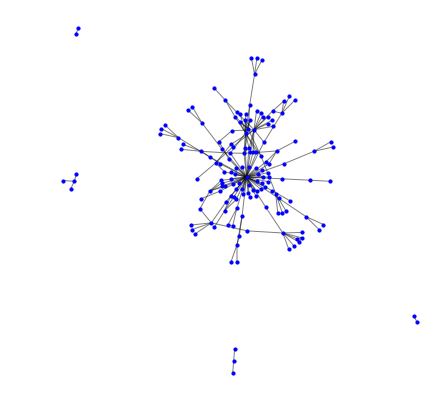

In [3]:
# Dead-end network exploration :) Not relevant for the solution, actually.
def find_edges(x):
    m = {}
    for i in x:
        m[i] = [j for j in x if ((j % i ==0) or (i % j ==0)) and (j != i)]
        
    return [(i,j) for i in x for j in m[i]]
    
def visualize(m):
    G = nx.Graph()
    G.add_edges_from(m)
    #nx.draw_kamada_kawai(G)
    pos=nx.spring_layout(G, iterations=50) # positions for all nodes
    
    plt.figure(figsize=(7,7))
    ax = plt.axes()
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color="blue")
    nx.draw_networkx_edges(G, pos, width=1.0,alpha=0.5)
    plt.axis('off')
    plt.show()
    #nx.draw_networkx_labels(G,pos,labels,font_size=16)
    
    
visualize(find_edges(x))

In [9]:
# My solution that was accepted and used less memory than almost any other solution out there, 
# but was also slower than any other solution out there :)

class Solution:
    def largestDivisibleSubset(self, nums):
        if len(nums)==0: return []
        if len(nums)==1: return nums
        self.a = {}
        self.mem = {}
        for i in range(1,len(nums)):
            for j in range(i):
                if (nums[i] % nums[j] == 0): # That is, i>j and (i,j) in div
                    if nums[i] in self.a:    self.a[nums[i]].append(nums[j])
                    else:                    self.a[nums[i]] = [nums[j]]
                if (nums[j] % nums[i] == 0):
                    if nums[j] in self.a:    self.a[nums[j]].append(nums[i])
                    else:                    self.a[nums[j]] = [nums[i]]
        # Now each a[i] points at all j such that i%j==0
                            
        p = list(self.a.keys())
        if len(p)==0:
            return [nums[0]]
    
        out = []
        for i in p:
            seq = self.longest_sequence(i)
            if len(seq)>len(out):
                out = seq.copy()
        return out
    
    def longest_sequence(self,i):
        if i not in self.a:
            return [i]
        if i in self.mem:
            return self.mem[i]
        out = []
        for j in self.a[i]:
            seq = self.longest_sequence(j)
            if len(seq)>len(out):
                out = seq
        self.mem[i] = [i]+out
        return self.mem[i]
    
S = Solution()
S.largestDivisibleSubset(x)

[7672, 3836, 959, 137]

In [10]:
# Good no-recursion solution from another user:

# We will use the fact that once the elements are sorted, % is transitive down. 
# If i % j == 0, then for evern k that j % k == 0, it is also true that i % k == 0.

class Solution2:
    def largestDivisibleSubset(self, nums):
        if not nums:                # Apparently that's a recommended way to check len(nums)==0. TIL!
            return []
        nums.sort()                 # Note that they sort the array
        n = len(nums)
        dp = [(-1, 1)] * n          # dp[i] : (j : nums[i]%nums[j]==0 that achieves max(len(seq)) , the value of len(seq))
        # By default, each i on its own, so there's no j kinda (-1), and we have a group of only 1 element (i itself)
        maxl = (0, 1)               # Same, but for storing current best value
        for i in range(1, n):       # As n is now sorted, we'll go through smaller values first ...
            for j in range(i):      # ... meaning that for j, everything is solved. (That's why no need in recursion!)
                if nums[i] % nums[j] == 0:
                    if dp[i][1] < dp[j][1] + 1:      # If j is more promising for i than the prev best choice:
                        dp[i] = (j, dp[j][1] + 1)    # update i, remembering that it's now in-group with j.
                        if maxl[1] < dp[i][1]:       # And check if could be the best-length sequence for now.
                            maxl = (i, dp[i][1])
        ret = []
        x = maxl[0]                 # j that starts the best sequence.
        while x > -1:               # Now jump from j to i (from larger to factor) & reconstruct the sequence
            ret.append(nums[x])
            x = dp[x][0]
        return ret[::-1]
    
S = Solution2()
S.largestDivisibleSubset(x)

[137, 959, 3836, 7672]